## 零知识证明前传-扩域、扭转点、嵌入度、扭曲曲线
在理解配对加密的时候，不可避免的要接触扩域、扭转点、嵌入度、扭曲曲线这些概念，用一篇文章把这些知识点做一个基本的介绍，要想深入的理解背后的数学知识，需要对群论、代数几何等进行相关系统的学习。

### 扩域
设L是一个域，如果K是L的一个子集在域L中的加法与乘法运算封闭且中每个元素的加法与乘法逆仍在K 中，则我们说K 是L的一个子域，L 看作K上的扩域，叫做 K 上的域扩张，记作$L/K$ 。扩域的用途非常广，例如：$\mathbb Q(\sqrt 2) = \{a+b\sqrt 2 | a, b \in Q\} $ 是有理数域$\mathbb Q$的扩域，很容易验证加减乘除都满足域的定义要求。更一般的定义为，给定域K和以K中元素为系数的K-不可约多项式P，P为K上的多项式环K[X]的元素，K[X]/P是域，而且是K的扩域。所有在有理数域不可约多项式例如$x^2-2, x^3-1 $都可以用来扩张有理数域，上面的$\mathbb Q(\sqrt 2) $ 等价于 $\mathbb Q /<x^2-2> $。复数域$\mathbb C $ 是实数域 $\mathbb R $的扩域，其定义为$\mathbb C=\{a+bi|i^2=-1, a,b \in \mathbb R\}$ ，也可以写作 $\mathbb C = \mathbb R/<x^2+1>$，其中元素实际上$\sqrt {-1} $的一元一次多项式。 在零知识证明里，我们比较关心有限域的扩域。

#### 有限域的扩域
给定一个有限域$\mathbb F_q $，将其扩展到$\mathbb F_{q^m} $，其中q是素数，m是任意阶，做法是选择一个$\mathbb F_q $上的m阶不可约多项式p(x)，按扩域的定义扩展得到$\mathbb F_{q^m} = \mathbb F_q[x]/<p(x)> $。例如著名的加密算法AES，就是在$\mathbb F_{2^8}=\mathbb F_2[x]/<x^8+x^4+x^3+1> $上，其中元素并不是用整数表示的，而是用系数为域$\mathbb F_2 $中元素的多项式表示。每个元素$A \in \mathbb F_{2^8} $都可以表示为：$\sum_{i=0}^{7} a_i*x^{i} $ 。配对加密算法里，就是找到一个对现有域$\mathbb F_q $进行m次扩张，得到一个域$\mathbb F_{q^m} $，然后分别构造有限域椭圆曲线乘法循环子群$G_1=\mathbb E(\mathbb F_{q}), G_2=\mathbb E(\mathbb F_{q^m})$和一个同态映射：$e:G_1 \times G_2 \rightarrow G_T $，其中$G_1$是$\mathbb E(\mathbb F_{q} $的r阶加法子群，$G_2$是 $\mathbb E(\mathbb F_{q^m}) $上的一个r阶的加法子群，$G_T$是$\mathbb F_{q^m} $上的一个r阶的乘法子群。构造同态映射的关键是要找到相应的扩域，其中有满足条件要求的两个子群，这就涉及到了下面嵌入度、扭转点、配对友好的概念。<br>

### 扭转点
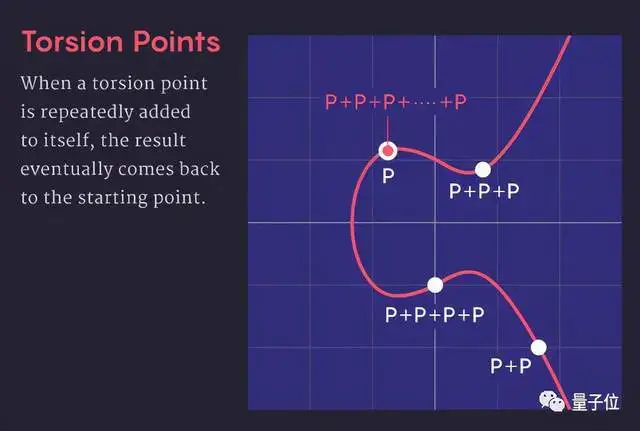
$E(\mathbb F_q) $有限域椭圆曲线定义点的加法，如果P点反复加上自己，经过有限次加法后（P+P+……+P）又回到P点，那么P就叫做“扭转点”（torsion point）。另外一种定义，如果存在$r \in \mathbb F_q, rP = \mathcal O $, 则称P是r-torsion point。显而易见，所有r阶扭转点构成一个循环子群。r阶扭转点有一个非常好的性质，如果我们对$\mathbb F_q $进行无限次扩域，$\mathbb F_{q^m}$，m是任意阶，下面数学定理指出，这样的r阶扭转点总共有$r^2$个，都位于$E(\mathbb F_{q^m}) $曲线上，其中r个位于$E(\mathbb F_q) $基域上，所以还有另外$r^2-r$个点。给定一个r，经过最少几次扩域，就能找到所有的r-torsion point，这个最少的扩域次数就是下文的嵌入度。<br>

#### 点的轨迹
定义$Tr(P)=\sum_{i=0}^{k-1} (x^{q^i}, y^{q^i}), P=(x,y) \in E(\mathbb F_{q^k}) $，Galois定理指出，$Tr(P) \in E(\mathbb F_{q}) $。


### 嵌入度
能满足r整除$q^k -1$的最小整数k，被称为曲线$E(\mathbb F_q) $的嵌入度。<br>
定理：设 $E: y^2=x^3 + ax + b$， 设r 是一个素数，且 $r \mid \#\E(\mathbb F_q)$ ，定义 $E(\mathbb F_q)[r] = \{P: rP=\mathcal O , P \in E(\mathbb F_q) \} $ ，易证 $E(\mathbb F_q)[r]$ 是 $E(\mathbb F_q)$ 的阶为r  的子群。假设 k 是满足$r \mid q^k-1 $  的最小的正整数（k  称为是关于 r 的嵌入度），那么$E(\mathbb F_{q^m})[r] $  是一个$r^2$阶的子群，而且它同构于两个 r 阶循环群的直积。

这个定理说明了，在基域上所有r 阶点和 $\mathcal O $ 构成 r 阶循环群，然后将域扩张到满足定理中的$r \mid q^k-1 $这个条件，那么这时在扩域上，所有 r 阶点和$\mathcal O $  构成了一个$r^2$阶的群。而且这个$r^2$  阶群是两个循环群的直积，进一步，由于这个群中所有元素的阶（除单位元）都是r  ，我们在这个群中随意找一个 r 阶元$P_1$ ，由它可生成一个 r 阶子群，然后在这个子群之外再随意找一个 r 阶元 $P_2$ ，那么显然$P_2$ 也生成了一个 r 阶子群，而且各自生成的子群的交就是单位元，因此，我们按照这个方法继续找所有其它r阶子群，它们的交集是单位元$\mathcal O $。

#### 简单例子
我们以一个简单的例子来进一步解释，设$q=11, r=3, E/\mathbb F_q: y^2=x^3+4$.$E(\mathbb F_q)$有12个点，可以计算 $r \mid q^2-1 $，因此嵌入度为2，所以构造$\mathbb F_{q^2} = \mathbb F_{q}[i]/<i^2+1>$，容易计算出9个3-阶扭转点如下图：
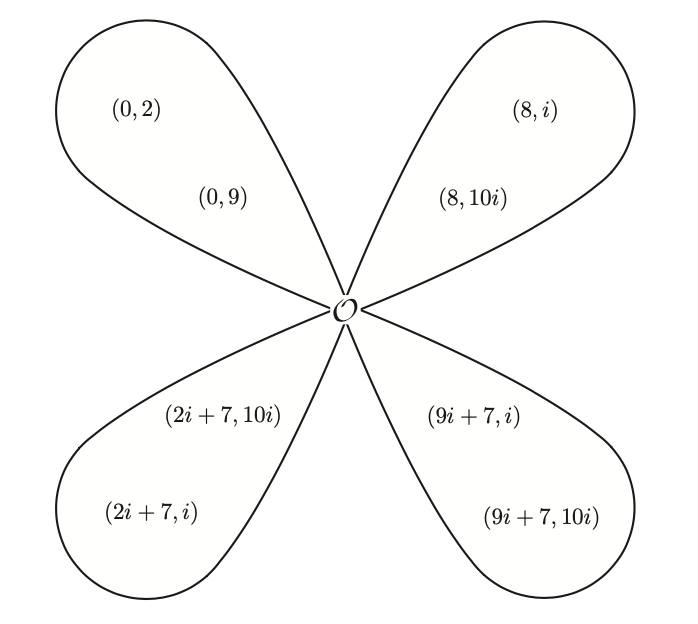
不难计算在包含$T=(8, i)$的那个子群中任意一点的轨迹都是$\mathcal O $

#### 复杂例子
设$q=11, r=3, E/\mathbb F_q: y^2=x^3+7x+2$。$E(\mathbb F_q)$有7个点，可以计算 $r \mid q^3-1 $，因此嵌入度为3，所以构造$\mathbb F_{q^3} = \mathbb F_{q}[u]/<u^3+u+4>$，容易计算出49个7-阶扭转点如下图：
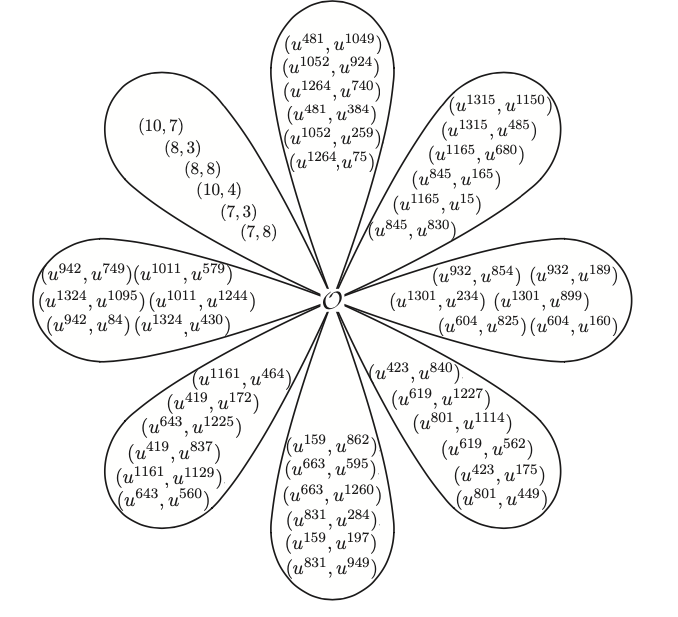
不难计算任意一点，例如$Q=(u^{481}, u^{1049}), Tr(Q)=(8,8), R=(u^{423}, u^{840}), Tr(R)=(10,7)$，说明Tr可以把任意点映射到基域中。这个例子还有一个重要的性质，在包含$T=(u^{1315}, u^{1150})$的那个子群中，所有点的轨迹都是$\mathcal O $

#### G1和G2
轨迹为$\mathcal O $的子群将是我们在配对密码里用到的子群G2，基域子群$E(\mathbb F_q)$将是我们用到的G1，这里还有一个问题，当嵌入度为6甚至12的时候，计算G2将是一个很恐怖的事情，为此引入扭曲曲线的概念，即twist curve。

### 扭曲曲线
因为 $G2$  中点的坐标都是在扩域 $\mathbb{F}_{q^k}$ 中，其上的计算量大，导致pairing计算的效率也比较低，因此我们想找另一条曲线 E' ，使得它与原曲线 E 同构，利用这个同构关系，将 E 上的 $G2$ 转化为 E′ 上的与之同构的子群，这个子群中点的坐标在一个较小的域 $\mathbb{F}_{q^d},d|k $上，因此，其上的计算会更快。我们称这样的曲线 E' 为 E 的孪生曲线(twist curve)，或者叫扭曲线。
设$q=103, r=7, E/\mathbb F_q: y^2=x^3+72$。$E(\mathbb F_q)$有84个点，可以计算 $r \mid q^6-1 $，因此嵌入度为6，所以构造$\mathbb F_{q^6} = \mathbb F_{q}[u]/<u^6+2>$，容易计算出49个7-阶扭转点如下图左：
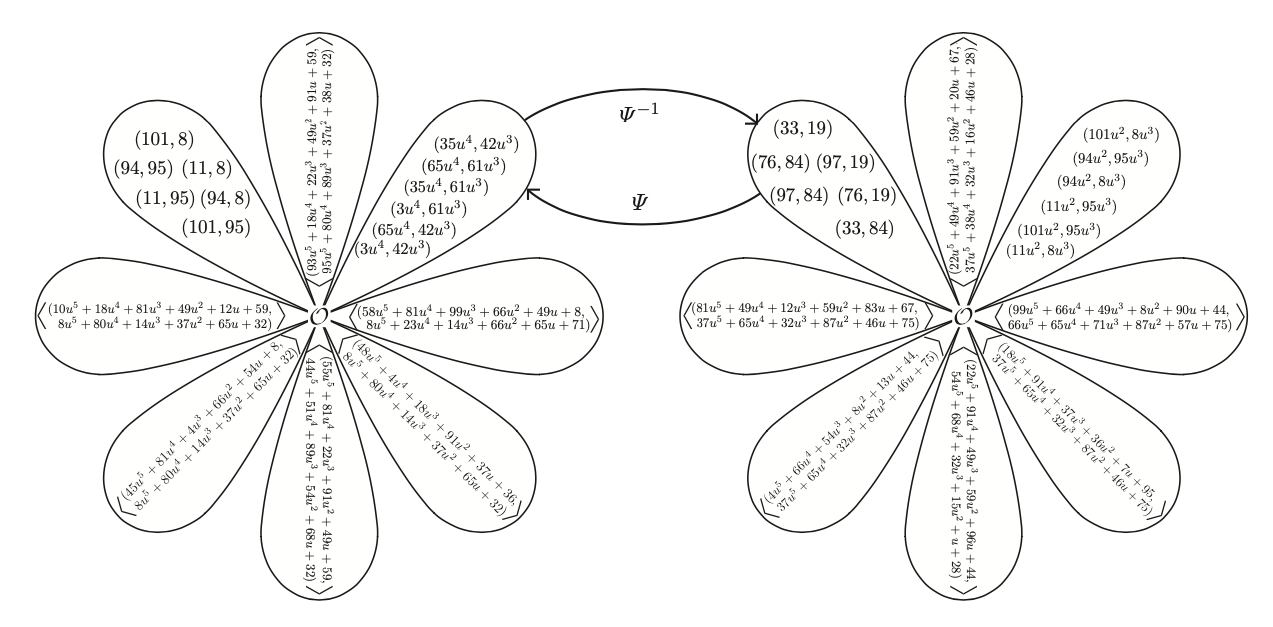
其中G2即轨迹都是$\mathcal O $的子群，其定义在$\mathbb F_{q^6}$，可以用$(35u^4, 42u^3)$生成。我们定义一个扭曲曲线为$E'/\mathbb F_q : y^2=x^3+72u^6$，同时定义两个同态映射：$\psi: E' \rightarrow E, (x', y')  \rightarrow (x'/u^2, y'/u^3), \psi^{-1}: E \rightarrow E', (x, y)  \rightarrow (u^2x, u^3y)$。通过引入扭曲曲线，构造同态映射，降低G2的计算量，这是配对加密里的基本技巧，在著名的BLS12-381曲线里，G2也是构造一个6次的扭曲曲线来达到相同的目的。
